In [4]:
using LsqFit, Distributions, GLM, DataFrames, CairoMakie, StatsBase, NaNStatistics, Base.Threads, DataFrames 
jnd2sigma(j::Real) = (1 /quantile(Normal(), 0.75)) * j # Convert JND to σ
sigma2k(sigma::Real) = 1.7 / sigma; # Convert σ to k
sigmoid(x::Vector, coeffs::Vector) = 1 ./ (1 .+ exp.(-coeffs[1].*(x.-coeffs[2])))

sigmoid (generic function with 1 method)

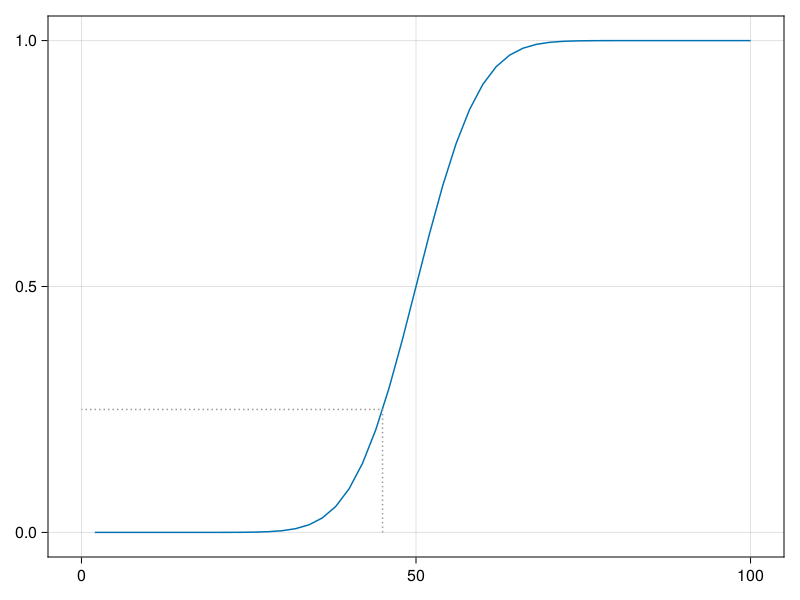

CairoMakie.Screen{IMAGE}


In [11]:
# Hardcoded parameters
valid_stims = collect(2:2:100) # These are the amplitudes that can be given 
## Define psychophysical curve as cumulative normal distribution
detection_threshold = 50 # microamps
jnd = 5 # microamps
sigma = jnd2sigma(jnd)

psychometric_pdf = Normal(detection_threshold, sigma)
pDetected = cdf(psychometric_pdf, valid_stims)
fig, ax, _ = lines(valid_stims, pDetected)
lines!(ax, [detection_threshold-jnd, detection_threshold-jnd, 0], [0, .25, .25], color = :gray60, linestyle = :dot)
display(fig)